In [2]:
import re

def parse_accuracies(log_file):
    """
    Извлекает списки тестовой и тренировочной точности из текста логов.

    Параметры:
        log_text (str): Текст логов, содержащий строки вида
                        "Accuracy on test set: XX.XX% (...)"
                        и "Accuracy on train set: YY.YY% (...)".

    Возвращает:
        Tuple[List[float], List[float]]: два списка — тестовых и тренировочных точностей.
    """
    with open(log_file + ".txt", "r", encoding="utf-8") as f:
        log_text = f.read()

    test_pattern = r"Accuracy on test set:\s*([\d\.]+)%"
    train_pattern = r"Accuracy on train set:\s*([\d\.]+)%"

    test_accs = [float(value) for value in re.findall(test_pattern, log_text)]
    train_accs = [float(value) for value in re.findall(train_pattern, log_text)]

    return log_file, test_accs, train_accs


In [2]:
import plotly.graph_objects as go
from os import walk
import matplotlib.pyplot as plt

def show_graph(path, interactive=True):
    filenames = next(walk(path), (None, None, []))[2]
    print(path)
    print(filenames)
    filenames = [file.split(".")[0] for file in filenames if file.split(".")[1] == "txt"]

    # Эпохи
    epochs = list(range(1, 11))

    data = []

    for file in filenames:
        if file.startswith('bench'):
            data.append(parse_accuracies(path + "/" + file))

    if interactive:
        # create figure
        fig = go.Figure()

        for d in data:
            fig.add_trace(go.Scatter(
                x=epochs, y=d[1],
                mode='lines',
                name=f"{d[0]}, тест"
            ))
            # to also plot training curves, uncomment:
            # fig.add_trace(go.Scatter(
            #     x=epochs, y=d[2],
            #     mode='lines',
            #     line=dict(dash='dash'),
            #     name=f"{d[0]}, тренировка"
            # ))

        # layout
        fig.update_layout(
            title="Сравнение точности моделей с разными RNG",
            xaxis_title="Эпоха",
            yaxis_title="Точность (%)",
            # legend=dict(orientation="v", x=0, y=1),
            template="plotly_white"
        )

        fig.show()
    else:
        plt.figure(figsize=(10, 6))

        for d in data:
            plt.plot(epochs, d[1], label=d[0] + ', тест')
            # plt.plot(epochs, d[2], linestyle='--', label=d[0] + ', тренировка')

        plt.xlabel('Эпоха')
        plt.ylabel('Точность (%)')
        plt.title('Сравнение точности моделей с разными RNG')
        plt.legend(loc='upper left', fontsize='small')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [3]:
# import matplotlib.pyplot as plt
# from os import walk

# filenames = next(walk("."), (None, None, []))[2]
# print(filenames)
# filenames = [file.split(".")[0] for file in filenames if file.split(".")[1] == "txt"]

# # Эпохи
# epochs = list(range(1, 11))

# data = []

# for file in filenames:
#     if file.startswith('bench'): data.append(parse_accuracies(file))

# # Данные моделей
# # data.append(parse_accuracies("improved-rng-dyn-seed"))
# # data.append(parse_accuracies("xorshift32-improved-no-seed"))

# glibc_test = [91.71, 92.77, 93.38, 93.60, 93.88, 94.71, 94.32, 93.16, 93.71, 94.99]
# glibc_train = [93.64, 94.85, 95.34, 95.74, 96.15, 97.12, 96.78, 95.97, 96.47, 97.31]

# x16_test = [90.65, 92.99, 91.99, 92.71, 94.05, 92.82, 94.71, 94.66, 94.60, 93.77]
# x16_train = [93.33, 95.06, 94.32, 95.32, 96.36, 95.58, 96.94, 97.12, 97.07, 96.57]

# x32_test = [92.15, 93.32, 92.77, 93.60, 91.82, 93.32, 93.38, 94.55, 92.10, 93.27]
# x32_train = [93.96, 94.82, 95.32, 95.95, 94.35, 96.00, 95.84, 97.25, 94.64, 95.79]

# low_test = [91.65, 92.38, 93.54, 92.43, 94.05, 94.10, 91.93, 93.16, 93.43, 94.44]
# low_train = [93.41, 94.69, 95.34, 95.37, 96.49, 96.83, 94.56, 95.92, 96.10, 97.10]

# plt.figure(figsize=(10, 6))

# for d in data:
#     # if (d[0] != "bench-xorshift-rs-temp" and d[0] != "bench-xorshift-rs"):
#     plt.plot(epochs, d[1], label=d[0] + ', тест')
#     # plt.plot(epochs, d[2], linestyle='--', label=d[0] + ', тренировка')

# # plt.plot(epochs, glibc_test, label='glibc, тест', marker='o')
# # plt.plot(epochs, glibc_train, linestyle='--', label='glibc, тренировка', marker='o')

# # plt.plot(epochs, x16_test, label='xorshift16, тест', marker='^')
# # plt.plot(epochs, x16_train, linestyle='--', label='xorshift16, тренировка', marker='^')

# # plt.plot(epochs, x32_test, label='xorshift32, тест', marker='s')
# # plt.plot(epochs, x32_train, linestyle='--', label='xorshift32, тренировка', marker='s')

# # plt.plot(epochs, low_test, label='xorshift32-lowbytes, тест', marker='d')
# # plt.plot(epochs, low_train, linestyle='--', label='xorshift32-lowbytes, тренировка', marker='d')

# plt.xlabel('Эпоха')
# plt.ylabel('Точность (%)')
# plt.title('Сравнение точности моделей с разными RNG')
# plt.legend(loc='upper left', fontsize='small')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [4]:
show_graph("ext/digits")

ext/digits
['bench-xorshift-modulo-temp.txt', 'bench-xorshift-modulo-temp-no-mul.txt', 'bench-xorshift-modulo.txt', 'bench-xorshift-low-bits.txt', 'bench-xorshift-glibc.txt', 'bench-xorshift-low-bits-no-mul.txt']


In [5]:
show_graph("nes/iris-nes")

nes/iris-nes
['bench-xorshift-modulo-temp.txt', 'bench-xorshift-modulo-temp-no-mul.txt', 'bench-xorshift-modulo.txt', 'bench-xorshift-low-bits.txt', 'bench-xorshift-glibc.txt', 'bench-xorshift-low-bits-no-mul.txt']


['bench-xorshift-modulo-temp.txt', 'bench-xorshift-modulo-temp-no-mul.txt', 'bench-xorshift-modulo.txt', 'plot-analyze.ipynb', 'bench-xorshift-low-bits.txt', 'bench-xorshift-glibc.txt', 'xorshift32-improved-seed-100.old', 'xorshift32-improved-no-rs.txt', 'xorshift32-improved-no-rs-no-seed.txt', 'random-bench.sh', 'xorshift32-improved-no-seed.txt', 'improved-rng-dyn-seed.txt', 'bench-xorshift-low-bits-no-mul.txt']


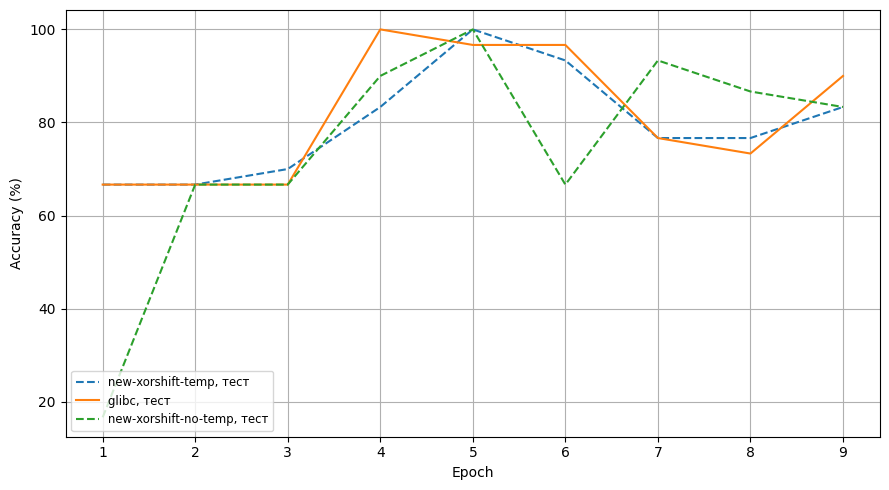

In [24]:
import matplotlib.pyplot as plt
from os import walk

filenames = next(walk("."), (None, None, []))[2]
print(filenames)
filenames = [file.split(".")[0] for file in filenames if file.split(".")[1] == "txt"]

# Эпохи
# epochs = list(range(1, 11))
epochs = list(range(1, 10))

data = []

for file in filenames:
    if file.startswith('bench'): data.append(parse_accuracies(file))

# Данные моделей
# data.append(parse_accuracies("improved-rng-dyn-seed"))
# data.append(parse_accuracies("xorshift32-improved-no-seed"))

# glibc_test = [91.71, 92.77, 93.38, 93.60, 93.88, 94.71, 94.32, 93.16, 93.71, 94.99]
# glibc_train = [93.64, 94.85, 95.34, 95.74, 96.15, 97.12, 96.78, 95.97, 96.47, 97.31]

# x16_test = [90.65, 92.99, 91.99, 92.71, 94.05, 92.82, 94.71, 94.66, 94.60, 93.77]
# x16_train = [93.33, 95.06, 94.32, 95.32, 96.36, 95.58, 96.94, 97.12, 97.07, 96.57]

# x32_test = [92.15, 93.32, 92.77, 93.60, 91.82, 93.32, 93.38, 94.55, 92.10, 93.27]
# x32_train = [93.96, 94.82, 95.32, 95.95, 94.35, 96.00, 95.84, 97.25, 94.64, 95.79]

# low_test = [91.65, 92.38, 93.54, 92.43, 94.05, 94.10, 91.93, 93.16, 93.43, 94.44]
# low_train = [93.41, 94.69, 95.34, 95.37, 96.49, 96.83, 94.56, 95.92, 96.10, 97.10]

plt.figure(figsize=(9, 5))

for d in data:
    # if (d[0] != "bench-xorshift-rs-temp" and d[0] != "bench-xorshift-rs"):
    if d[0].endswith('glibc'):
        plt.plot(epochs, d[1][:-1], label='glibc, тест')
    elif d[0][15:] == 'modulo-temp':
        plt.plot(epochs, d[1][:-1], label='new-xorshift-temp, тест', linestyle='--')
    elif d[0][15:] == 'low-bits-no-mul':
        plt.plot(epochs, d[1][:-1], label='new-xorshift-no-temp, тест', linestyle='--')
    # plt.plot(epochs, d[2], linestyle='--', label=d[0] + ', тренировка')

# plt.plot(epochs, glibc_test, label='glibc, тест', marker='o')
# plt.plot(epochs, glibc_train, linestyle='--', label='glibc, тренировка', marker='o')

# plt.plot(epochs, x16_test, label='xorshift16, тест', marker='^')
# plt.plot(epochs, x16_train, linestyle='--', label='xorshift16, тренировка', marker='^')

# plt.plot(epochs, x32_test, label='xorshift32, тест', marker='s')
# plt.plot(epochs, x32_train, linestyle='--', label='xorshift32, тренировка', marker='s')

# plt.plot(epochs, low_test, label='xorshift32-lowbytes, тест', marker='d')
# plt.plot(epochs, low_train, linestyle='--', label='xorshift32-lowbytes, тренировка', marker='d')

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
# plt.title('Сравнение точности моделей с разными RNG')
plt.legend(loc='lower left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# import plotly.graph_objects as go
# from os import walk

# filenames = next(walk("."), (None, None, []))[2]
# print(filenames)
# filenames = [file.split(".")[0] for file in filenames if file.split(".")[1] == "txt"]

# # Эпохи
# epochs = list(range(1, 11))

# data = []

# for file in filenames:
#     if file.startswith('bench'):
#         data.append(parse_accuracies(file))

# # Данные моделей
# # data.append(parse_accuracies("improved-rng-dyn-seed"))
# # data.append(parse_accuracies("xorshift32-improved-no-seed"))

# glibc_test  = [91.71, 92.77, 93.38, 93.60, 93.88, 94.71, 94.32, 93.16, 93.71, 94.99]
# glibc_train = [93.64, 94.85, 95.34, 95.74, 96.15, 97.12, 96.78, 95.97, 96.47, 97.31]

# x16_test    = [90.65, 92.99, 91.99, 92.71, 94.05, 92.82, 94.71, 94.66, 94.60, 93.77]
# x16_train   = [93.33, 95.06, 94.32, 95.32, 96.36, 95.58, 96.94, 97.12, 97.07, 96.57]

# x32_test    = [92.15, 93.32, 92.77, 93.60, 91.82, 93.32, 93.38, 94.55, 92.10, 93.27]
# x32_train   = [93.96, 94.82, 95.32, 95.95, 94.35, 96.00, 95.84, 97.25, 94.64, 95.79]

# low_test    = [91.65, 92.38, 93.54, 92.43, 94.05, 94.10, 91.93, 93.16, 93.43, 94.44]
# low_train   = [93.41, 94.69, 95.34, 95.37, 96.49, 96.83, 94.56, 95.92, 96.10, 97.10]

# # create figure
# fig = go.Figure()

# for d in data:
#     # if (d[0] != "bench-xorshift-rs-temp" and d[0] != "bench-xorshift-rs"):
#     fig.add_trace(go.Scatter(
#         x=epochs, y=d[1],
#         mode='lines',
#         name=f"{d[0]}, тест"
#     ))
#     # to also plot training curves, uncomment:
#     # fig.add_trace(go.Scatter(
#     #     x=epochs, y=d[2],
#     #     mode='lines',
#     #     line=dict(dash='dash'),
#     #     name=f"{d[0]}, тренировка"
#     # ))

# # fig.add_trace(go.Scatter(
# #     x=epochs, y=glibc_test,
# #     mode='lines+markers',
# #     name='glibc, тест',
# # ))
# # fig.add_trace(go.Scatter(
# #     x=epochs, y=glibc_train,
# #     mode='lines+markers',
# #     line=dict(dash='dash'),
# #     name='glibc, тренировка',
# # ))

# # Uncomment any of these to add & toggle additional curves:
# # fig.add_trace(go.Scatter(x=epochs, y=x16_test, mode='lines+markers', name='xorshift16, тест'))
# # fig.add_trace(go.Scatter(x=epochs, y=x16_train, mode='lines+markers', line=dict(dash='dash'), name='xorshift16, тренировка'))
# # fig.add_trace(go.Scatter(x=epochs, y=x32_test, mode='lines+markers', name='xorshift32, тест'))
# # fig.add_trace(go.Scatter(x=epochs, y=x32_train, mode='lines+markers', line=dict(dash='dash'), name='xorshift32, тренировка'))
# # fig.add_trace(go.Scatter(x=epochs, y=low_test, mode='lines+markers', name='xorshift32-lowbytes, тест'))
# # fig.add_trace(go.Scatter(x=epochs, y=low_train, mode='lines+markers', line=dict(dash='dash'), name='xorshift32-lowbytes, тренировка'))

# # layout
# fig.update_layout(
#     title="Сравнение точности моделей с разными RNG",
#     xaxis_title="Эпоха",
#     yaxis_title="Точность (%)",
#     # legend=dict(orientation="v", x=0, y=1),
#     template="plotly_white"
# )

# fig.show()
